## 24W-COM SCI-M148 Project 1

Name: Krish Patel

UID: 605 796 227

### **Submission Guidelines (Due: Jan 29 before the class)**

1. Please fill in your name and UID above.

2. Please submit a **PDF printout** of your Jupyter Notebook to **Gradescope**. If you have any trouble accessing Gradescope, please let a TA know ASAP.  

3. When submitting to Gradescope, you will be taken to a page that asks you to assign questions and pages. As the PDF can get long, please make sure to assign pages to corresponding questions to ensure the readers know where to look.  



## Introduction

Welcome to **CS148 - Introduction to Data Science!** As we're planning to move through topics aggressively in this course, to start out, we'll look to do an end-to-end walkthrough of a datascience project, and then ask you to replicate the code yourself for a new dataset.

**Please note: We don't expect you to fully grasp everything happening here in either code or theory. This content will be reviewed throughout the quarter. Rather we hope that by giving you the full perspective on a data science project it will better help to contextualize the pieces as they're covered in class**

In that spirit, we will first work through an example project from end to end to give you a feel for the steps involved.

Here are the main steps:

1. Get the data
2. Visualize the data for insights
3. Preprocess the data for your machine learning algorithm
4. Select a machine learning model and train it
5. Evaluate its performance



## Working with Real Data

It is best to experiment with real-data as opposed to aritifical datasets.

There are many different open datasets depending on the type of problems you might be interested in!

Here are a few data repositories you could check out:
- [UCI Datasets](http://archive.ics.uci.edu/ml/)
- [Kaggle Datasets](kaggle.com)
- [AWS Datasets](https://registry.opendata.aws)

Below we will run through an California Housing example collected from the 1990's.

## Setup

We'll start by importing a series of libraries we'll be using throughout the project.

In [708]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
#assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline
import matplotlib # plotting library
import matplotlib.pyplot as plt


## Intro to Data Exploration Using Pandas

In this section we will load the dataset, and visualize different
features using different types of plots.

Packages we will use:
- **[Pandas](https://pandas.pydata.org):** is a fast, flexibile and expressive data structure widely used for tabular and multidimensional datasets.
- **[Matplotlib](https://matplotlib.org)**: is a 2d python plotting library which you can use to create quality figures (you can plot almost anything if you're willing to code it out!)
    - other plotting libraries:[seaborn](https://seaborn.pydata.org), [ggplot2](https://ggplot2.tidyverse.org)

Note: If you're working in CoLab for this project, the CSV file first has to be loaded into the environment. This can be done manually using the sidebar menu option, or using the following code here.

If you're running this notebook locally on your device, simply proceed to the next step.

We'll now begin working with Pandas. Pandas is the principle library for data management in python. It's primary mechanism of data storage is the dataframe, a two dimensional table, where each column represents a datatype, and each row a specific data element in the set.

To work with dataframes, we have to first read in the csv file and convert it to a dataframe using the code below.

In [709]:
# We'll now import the holy grail of python datascience: Pandas!
import pandas as pd
housing = pd.read_csv('housing.csv')


In [710]:
housing.head() # show the first few elements of the dataframe
               # typically this is the first thing you do
               # to see how the dataframe looks like

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

A dataset may have different types of features
- real valued
- Discrete (integers)
- categorical (strings)
- Boolean

The two categorical features are essentialy the same as you can always map a categorical string/character to an integer.

In the dataset example, all our features are real valued floats, except ocean proximity which is categorical.

In [711]:
# to see a concise summary of data types, null values, and counts
# use the info() method on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [712]:
# you can access individual columns similarly
# to accessing elements in a python dict
housing["ocean_proximity"].head() # added head() to avoid printing many columns..

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [713]:
# to access a particular row we can use iloc
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age        21.0
total_rooms             7099.0
total_bedrooms          1106.0
population              2401.0
households              1138.0
median_income           8.3014
median_house_value    358500.0
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [714]:
# one other function that might be useful is
# value_counts(), which counts the number of occurences
# for categorical features
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [715]:
# The describe function compiles your typical statistics for each
# column
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

#### If you want to learn about different ways of accessing elements or other functions it's useful to check out the getting started section [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)

## Let's start visualizing the dataset

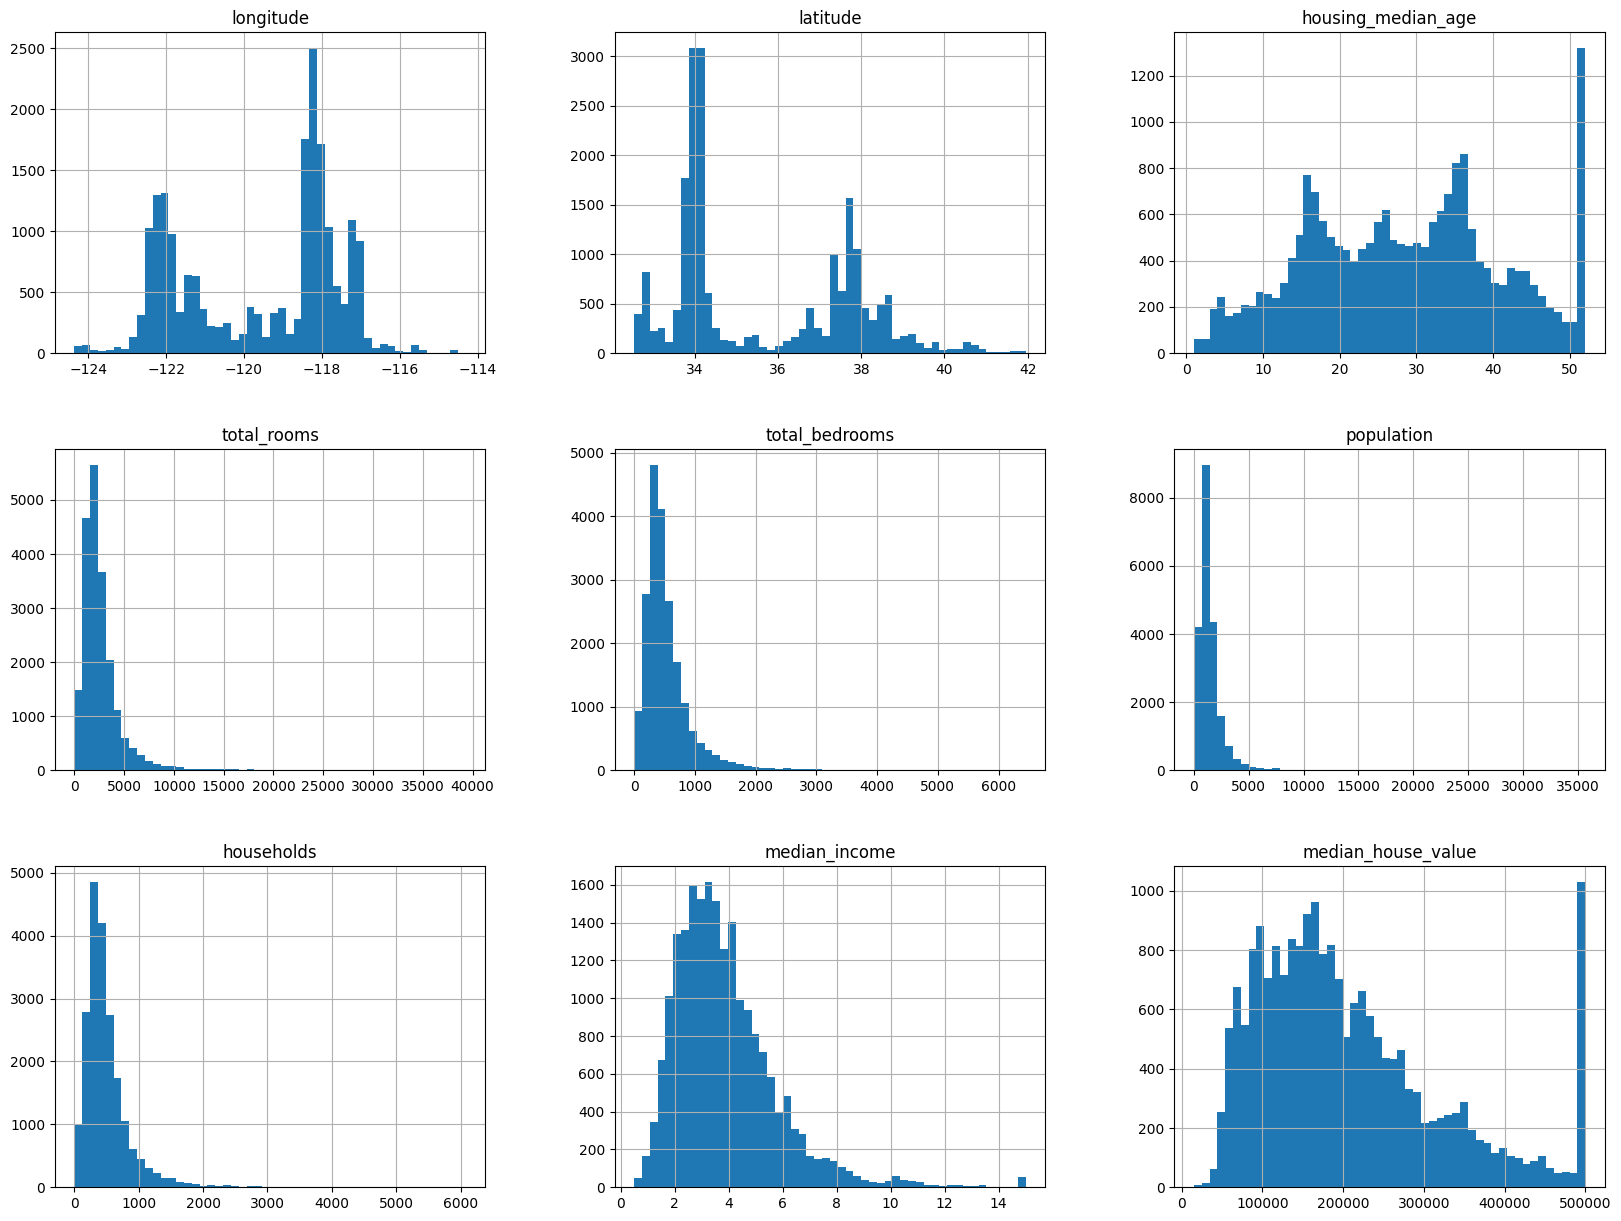

In [716]:
# We can draw a histogram for each of the dataframes features
# using the hist function
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show() # pandas internally uses matplotlib, and to display all the figures
           # the show() function must be called

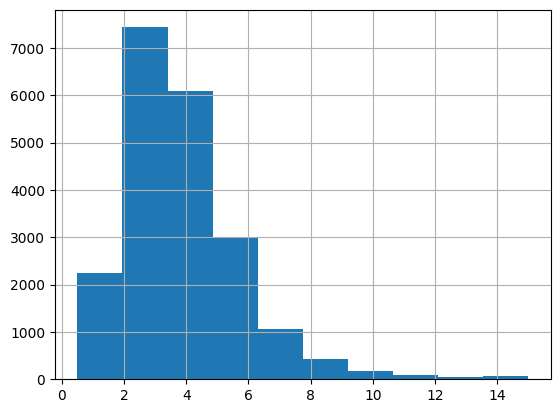

In [717]:
# if you want to have a histogram on an individual feature:
housing["median_income"].hist()
plt.show()

We can convert a floating point feature to a categorical feature
by binning or by defining a set of intervals.

For example, to bin the
households based on median_income we can use the pd.cut function

In [718]:
# assign each bin a categorical value [1, 2, 3, 4, 5] in this case.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

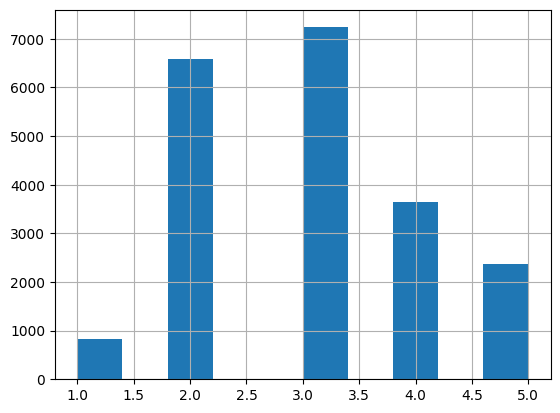

In [719]:
housing["income_cat"].hist()

#### Next let's visualize the household incomes based on latitude & longitude coordinates

<Axes: xlabel='longitude', ylabel='latitude'>

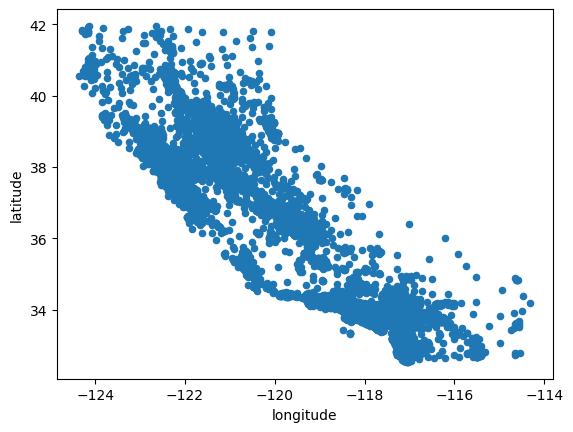

In [720]:
## here's a not so interestting way plotting it
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

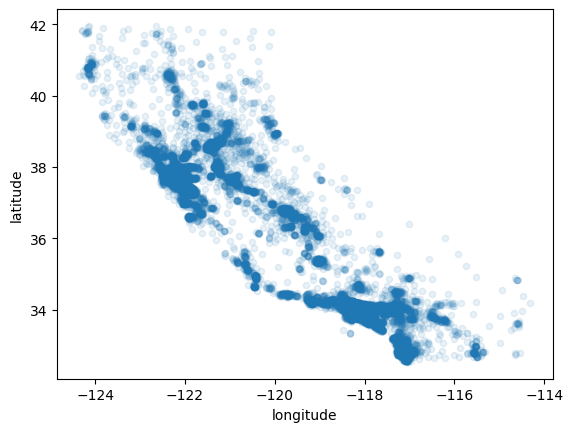

In [721]:
# we can make it look a bit nicer by using the alpha parameter,
# it simply plots less dense areas lighter.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

/var/folders/jl/_k9n1dsd7rg1x3mrfs7130y40000gn/T/ipykernel_3132/2129115766.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



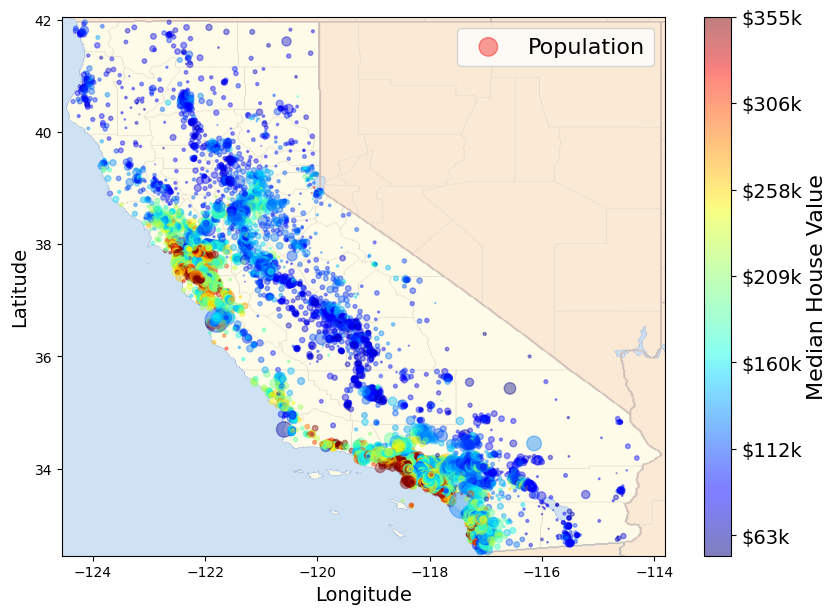

In [722]:
# A more interesting plot is to color code (heatmap) the dots
# based on income. The code below achieves this

# Please note: In order for this to work, ensure that you've loaded an image
# of california (california.png) into this directory prior to running this

import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cb.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

Not suprisingly, the most expensive houses are concentrated around the San Francisco/Los Angeles areas.

Up until now we have only visualized feature histograms and basic statistics.

When developing machine learning models the predictiveness of a feature for a particular target of interest is what's important.

It may be that only a few features are useful for the target at hand, or features may need to be augmented by applying certain transfomrations.

None the less we can explore this using correlation matrices.

In [723]:

corr_matrix = housing.corr(numeric_only=True)

In [724]:
# for example if the target is "median_house_value", most correlated features can be sorted
# which happens to be "median_income". This also intuitively makes sense.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

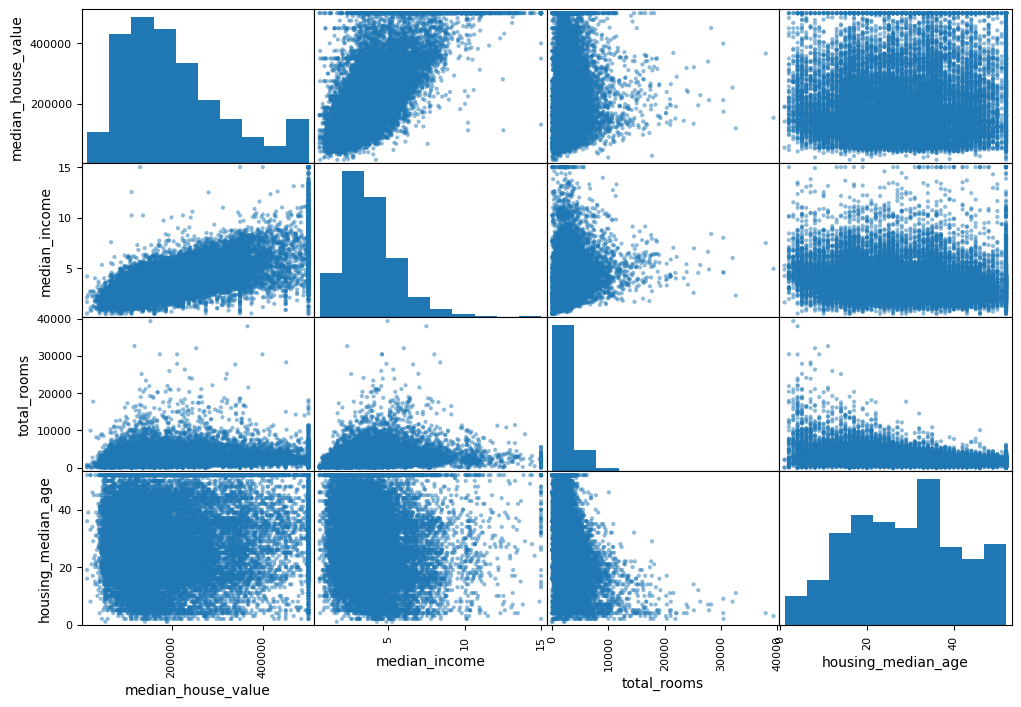

In [725]:
# the correlation matrix for different attributes/features can also be plotted
# some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

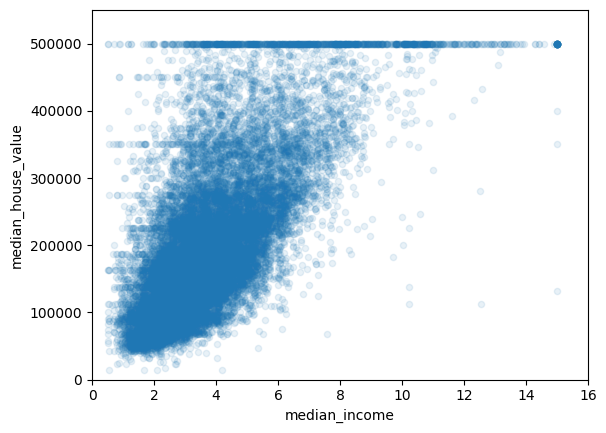

In [726]:
# median income vs median house vlue plot plot 2 in the first row of top figure
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [727]:
# obtain new correlations
corr_matrix = housing.corr(numeric_only=True )
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Preparing Dastaset for ML

### Dealing With Incomplete Data

In [728]:
# have you noticed when looking at the dataframe summary certain rows
# contained null values? we can't just leave them as nulls and expect our
# model to handle them for us...
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0             NaN   
341    -122.17     37.75                38.0        992.0             NaN   
538    -122.28     37.78                29.0       5154.0             NaN   
563    -122.24     37.75                45.0        891.0             NaN   
696    -122.10     37.69                41.0        746.0             NaN   

     population  households  median_income  median_house_value  \
290       570.0       218.0         4.3750            161900.0   
341       732.0       259.0         1.6196             85100.0   
538      3741.0      1273.0         2.5762            173400.0   
563       384.0       146.0         4.9489            247100.0   
696       387.0       161.0         3.9063            178400.0   

    ocean_proximity income_cat  
290        NEAR BAY          3  
341        NEAR BAY          2  
538        NEAR BAY          2  
563        NEAR BAY          4  
696        NEAR BAY          3

In [729]:

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1: simply drop rows that have null values

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, income_cat]
Index: []

In [730]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2: drop the complete feature



longitude  latitude  housing_median_age  total_rooms  population  \
290    -122.16     37.77                47.0       1256.0       570.0   
341    -122.17     37.75                38.0        992.0       732.0   
538    -122.28     37.78                29.0       5154.0      3741.0   
563    -122.24     37.75                45.0        891.0       384.0   
696    -122.10     37.69                41.0        746.0       387.0   

     households  median_income  median_house_value ocean_proximity income_cat  
290       218.0         4.3750            161900.0        NEAR BAY          3  
341       259.0         1.6196             85100.0        NEAR BAY          2  
538      1273.0         2.5762            173400.0        NEAR BAY          2  
563       146.0         4.9489            247100.0        NEAR BAY          4  
696       161.0         3.9063            178400.0        NEAR BAY          3

In [731]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3: replace na values with median values
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0           435.0   
341    -122.17     37.75                38.0        992.0           435.0   
538    -122.28     37.78                29.0       5154.0           435.0   
563    -122.24     37.75                45.0        891.0           435.0   
696    -122.10     37.69                41.0        746.0           435.0   

     population  households  median_income  median_house_value  \
290       570.0       218.0         4.3750            161900.0   
341       732.0       259.0         1.6196             85100.0   
538      3741.0      1273.0         2.5762            173400.0   
563       384.0       146.0         4.9489            247100.0   
696       387.0       161.0         3.9063            178400.0   

    ocean_proximity income_cat  
290        NEAR BAY          3  
341        NEAR BAY          2  
538        NEAR BAY          2  
563        NEAR BAY          4  
696        NEAR BAY          3

Now that we've played around with this, lets finalize this approach by replacing the nulls in our final dataset


In [732]:
housing["total_bedrooms"].fillna(median, inplace=True)

Could you think of another plausible imputation for this dataset?

### Augmenting Features
New features can be created by combining different columns from our data set.

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- etc.

In [733]:
housing 
housing["rooms_per_household"] = housing["total_rooms"]/(housing["households"] + 1e-6)
housing["bedrooms_per_room"] = housing["total_bedrooms"]/(housing["total_rooms"] + 1e-6)
housing["population_per_household"]=housing["population"]/(housing["households"] + 1e-6)

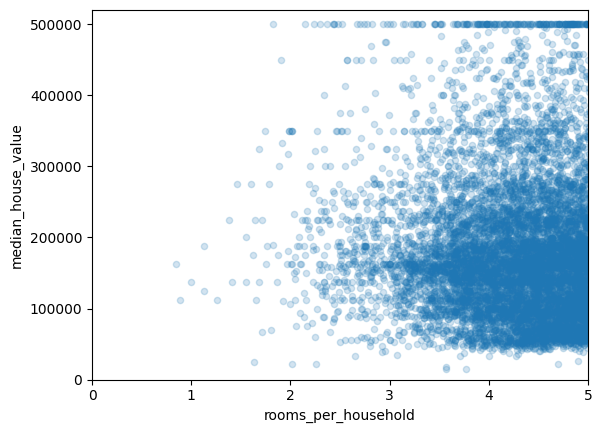

In [734]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

### Dealing with Non-Numeric Data

So we're almost ready to feed our dataset into a machine learning model, but we're not quite there yet!

Generally speaking all models can only work with numeric data, which means that if you have Categorical data you want included in your model, you'll need to do a numeric conversion. We'll explore this more later, but for now we'll take one approach to converting our `ocean_proximity` field into a numeric one.

In [735]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
housing['ocean_proximity'] = labelencoder.fit_transform(housing['ocean_proximity'])
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  \
0       322.0       126.0         8.3252            452600.0                3   
1      2401.0      1138.0         8.3014            358500.0                3   
2       496.0       177.0         7.2574            352100.0                3   
3       558.0       219.0         5.6431            341300.0                3   
4       565.0       259.0         3.8462            342200.0                3   

  income_cat  rooms_per_household  bedrooms_per_room  population_per_household  
0          5             6.984127           0.146591                  2.555556  
1          5             6.238137           0.155797                  2.109842  
2          5             8.288136           0.129516                  2.802260  
3          4             5.817352           0.184458                  2.547945  
4          3             6.281853           0.172096                  2.181467

### Divide up the Dataset for Machine Learning

After having cleaned your dataset you're ready to train your machine learning model.

To do so you'll aim to divide your data into:
- train set
- test set

In some cases you might also have a validation set as well for tuning hyperparameters (don't worry if you're not familiar with this term yet..)

In supervised learning setting your train set and test set should contain (**feature**, **target**) tuples.
 - **feature**: is the input to your model
 - **target**: is the ground truth label
     - when target is categorical the task is a classification task
     - when target is floating point the task is a regression task
     
We will make use of **[scikit-learn](https://scikit-learn.org/stable/)** python package for preprocessing.

Scikit learn is pretty well documented and if you get confused at any point simply look up the function/object!

In [736]:
from sklearn.model_selection import StratifiedShuffleSplit
# let's first start by creating our train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [737]:
housing_training = train_set.drop("median_house_value", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
housing_labels = train_set["median_house_value"].copy()

In [738]:
housing_testing = test_set.drop("median_house_value", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
housing__test_labels = test_set["median_house_value"].copy()

### Select a model and train

Once we have prepared the dataset it's time to choose a model.

As our task is to predict the median_house_value (a floating value), regression is well suited for this.

In [739]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_training, housing_labels)




LinearRegression()

In [740]:
data = housing_testing.iloc[:5]
labels = housing__test_labels.iloc[:5]

print("Predictions:", lin_reg.predict(data))
print("Actual labels:", list(labels))

Predictions: [418197.21048506 305620.51781478 232253.02900543 188754.57142335
 251166.41766858]
Actual labels: [500001.0, 162500.0, 204600.0, 159700.0, 184000.0]


We can evaluate our model using certain metrics, a fitting metric for regresison is the mean-squared-loss

$$L(\hat{Y}, Y) = \frac{1}{N} \sum_i^N (\hat{y_i} - y_i)^2$$

where $\hat{y}$ is the predicted value, and y is the ground truth label.

In [741]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(housing_testing)
mse = mean_squared_error(housing__test_labels, preds)
rmse = np.sqrt(mse)
rmse

67694.0818434439

Is this a good result? What do you think an acceptable error rate is for this sort of problem?

# TODO: Applying the end-end ML steps to a different dataset.

Ok now it's time to get to work! We will apply what we've learnt to another dataset (airbnb dataset). For this project we will attempt to **predict the airbnb rental price based on other features in our given dataset.**

# Visualizing Data


### Load the data + statistics

Let's do the following set of tasks to get us warmed up:
- load the dataset
- display the first few rows of the data
- drop the following columns: name, host_id, host_name, last_review, neighbourhood
- display a summary of the statistics of the loaded data

In [742]:
import pandas as pd
airbnb =  pd.read_csv('AB_NYC_2019.csv') # we load the pandas dataframe

In [743]:
airbnb_drop = airbnb.head() # WRITE YOUR CODE HERE #
airbnb_drop

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [744]:
airbnb_drop.describe()

id      host_id   latitude  longitude       price  \
count     5.000000     5.000000   5.000000   5.000000    5.000000   
mean   3526.800000  4465.000000  40.738756 -73.960358  138.600000   
std    1023.060213  1807.464937   0.070592   0.018037   58.303516   
min    2539.000000  2787.000000  40.647490 -73.983770   80.000000   
25%    2595.000000  2845.000000  40.685140 -73.972370   89.000000   
50%    3647.000000  4632.000000  40.753620 -73.959760  149.000000   
75%    3831.000000  4869.000000  40.798510 -73.943990  150.000000   
max    5022.000000  7192.000000  40.809020 -73.941900  225.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count        5.000000               5.00           4.000000   
mean         3.200000              66.60           1.332500   
std          3.898718             115.01           2.208006   
min          1.000000               0.00           0.100000   
25%          1.000000               9.00           0.182500   
50%          1.000000               9.00           0.295000   
75%          3.000000              45.00           1.445000   
max         10.000000             270.00           4.640000   

       calculated_host_listings_count  availability_365  
count                        5.000000          5.000000  
mean                         2.200000        255.800000  
std                          2.167948        160.423502  
min                          1.000000          0.000000  
25%                          1.000000        194.000000  
50%                          1.000000        355.000000  
75%                          2.000000        365.000000  
max                          6.000000        365.000000

In [745]:
airbnb_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5 non-null      int64  
 1   name                            5 non-null      object 
 2   host_id                         5 non-null      int64  
 3   host_name                       5 non-null      object 
 4   neighbourhood_group             5 non-null      object 
 5   neighbourhood                   5 non-null      object 
 6   latitude                        5 non-null      float64
 7   longitude                       5 non-null      float64
 8   room_type                       5 non-null      object 
 9   price                           5 non-null      int64  
 10  minimum_nights                  5 non-null      int64  
 11  number_of_reviews               5 non-null      int64  
 12  last_review                     4 non-nu

### Some Basic Visualizations

Let's try another popular python graphics library: Plotly.

You can find documentation and all the examples you'll need here: [Plotly Documentation](https://plotly.com/python/basic-charts/)


Let's start out by getting a better feel for the distribution of rentals in the market.

####Generate a pie chart showing the distribution of rental units across NYC's 5 Buroughs (`neighbourhood_groups` in the dataset)####

In [746]:
import os
import pandas as pd
import nbformat
os.system("pip install plotly --upgrade")
print(nbformat.__version__)
import plotly.express as px
neighborhood = pd.DataFrame(airbnb)
neighborhood.head()
fig = px.pie(neighborhood, names='neighbourhood_group', title='Distribution of Rental Units Across NYC\'s 5 Boroughs')
fig.show()



5.9.2


#### Plot the total number_of_reviews per neighbourhood_group

We now want to see the total number of reviews left for each neighborhood group in the form of a Bar Chart (where the X-axis is the neighbourhood group and the Y-axis is a count of review.

This is a two step process:
1.   You'll have to sum up the reviews per neighbourhood group **(hint! try using the groupby function)**
2.   Then use Plotly to generate the graph





In [747]:
grouped_data = neighborhood.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()

fig = px.bar(grouped_data, x='neighbourhood_group', y='number_of_reviews', labels={'number_of_reviews': 'Total Number of Reviews'}, 
             title='Total Number of Reviews per Neighbourhood Group')
fig.update_xaxes(title='Neighbourhood Group')
fig.update_yaxes(title='Total Number of Reviews')


fig.show()

### Plot a map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ).

For reference you can use the Matplotlib code above to replicate this graph here.

<Axes: xlabel='longitude', ylabel='latitude'>

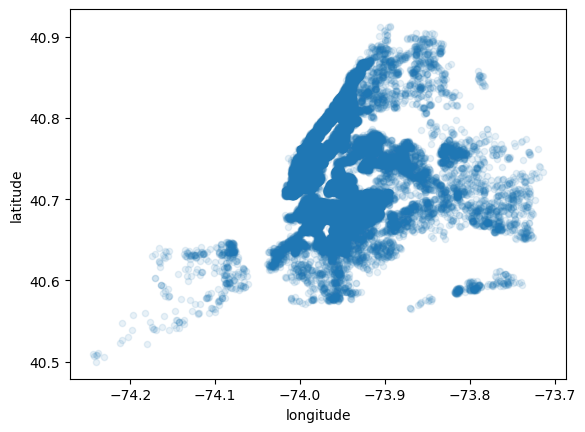

In [748]:
airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

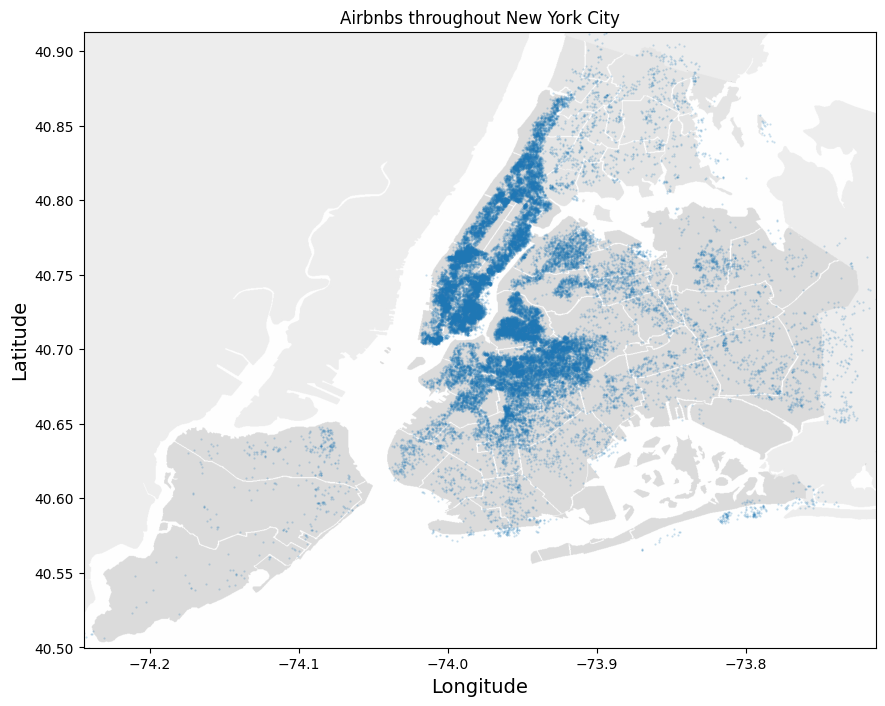

/var/folders/jl/_k9n1dsd7rg1x3mrfs7130y40000gn/T/ipykernel_3132/2757423461.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



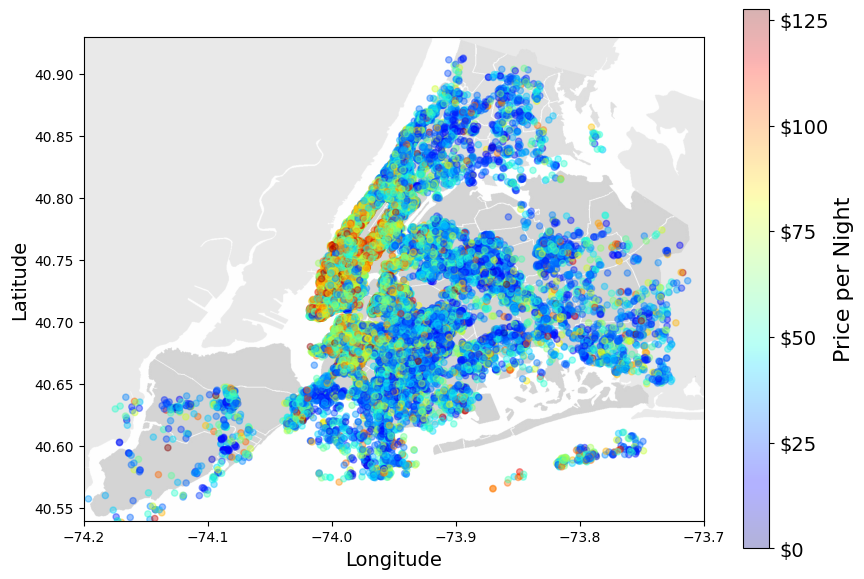

In [749]:

miniairbnb = airbnb.sample(frac=1.0)


import matplotlib.image as mpimg
nyc_img=mpimg.imread('nyc.png', -1)

# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.

ax2 = airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.25, figsize=(15,8), s=0.25)
plt.imshow(nyc_img, extent=[-74.244420, -73.712990, 40.499790, 40.913060], alpha=0.25)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Airbnbs throughout New York City")
plt.show()
# WRITE YOUR CODE HERE #


#for the heatmap:
miniairbnb[miniairbnb["price"] >= 250] = 250
ax = miniairbnb.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                        cmap=plt.get_cmap("jet"), c="price", colorbar=False, alpha=0.4)

plt.imshow(nyc_img, extent=[-74.2, -73.7, 40.54, 40.93], alpha=0.3, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = miniairbnb["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%d"%v for v in tick_values], fontsize=14)
cb.set_label("Price per Night", fontsize=16)

plt.show()

Now try to recreate this plot using Plotly's Scatterplot functionality. Note that the increased interactivity of the plot allows for some very cool functionality

In [760]:
miniairbnb = airbnb.sample(frac=1.0)

# Limiting price values to 250 as per your commented line
# miniairbnb[miniairbnb["price"] >= 250] = 250

latitudes = miniairbnb['latitude'].to_numpy()
longitudes = miniairbnb['longitude'].to_numpy()
print(latitudes)

fig = px.scatter(miniairbnb, x="longitude", y="latitude")
extent = [-74.2, -73.7, 40.54, 40.93]
nyc_img = Image.open("./nyc.png")
fig.add_layout_image(
    dict(
        source=nyc_img,
        xref="x",
        yref="y",
        x=extent[0],
        y=extent[3],
        sizex=extent[1]-extent[0],
        sizey=extent[3]-extent[2],
        sizing="stretch",
        opacity=0.3,  
        layer="below"
    )
)
fig.update_xaxes(range=[extent[0], extent[1]])
fig.update_yaxes(range=[extent[2], extent[3]])

fig.show()

[40.75318 40.6455  40.68257 ... 40.72912 40.82831 40.83878]


### Use Plotly to plot the average price of room types in Brooklyn who have at least 10 Reviews.

Like with the previous example you'll have to do a little bit of data engineering before you actually generate the plot.

Generally I'd recommend the following series of steps:
1. Filter the data by neighborhood group and number of reviews to arrive at the subset of data relevant to this graph.
2. Groupby the room type
3. Take the mean of the price for each roomtype group
4. FINALLY (seriously!?!?) plot the result

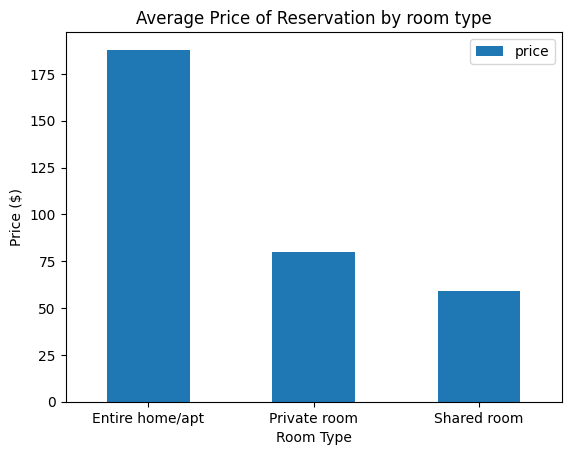

In [751]:

airbnb["price"] = pd.to_numeric(airbnb["price"], errors='coerce')
airbnb["price"].fillna(0, inplace=True)

avg_reviews_prices = airbnb[airbnb["number_of_reviews"] > 10].groupby("room_type")["price"].mean()
avg_reviews_prices = avg_reviews_prices.reset_index()

fig = avg_reviews_prices.plot.bar(x="room_type", y="price", rot=0)
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.title("Average Price of Reservation by room type")
plt.show()


# Prepare the Data

In [752]:
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Feature Engineering

Let's create a new binned feature, `price_cat` that will divide our dataset into quintiles (1-5) in terms of price level (you can choose the levels to assign)

Do a value count to check the distribution of values

In [753]:
airbnb["price_cat"] = pd.cut(airbnb["price"],
                               bins=[0, 60, 120, 180, 240., np.inf],
                               labels=[1, 2, 3, 4, 5])
airbnb["price_cat"].value_counts()

price_cat
2    17490
1    10052
3     9902
5     6523
4     4917
Name: count, dtype: int64

### Data Imputation

Determine if there are any null-values and impute them.

In [754]:
sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)].head()
sample_incomplete_rows

id                                               name  host_id  \
2    3647                THE VILLAGE OF HARLEM....NEW YORK !     4632   
19   7750                  Huge 2 BR Upper East  Cental Park    17985   
26   8700  Magnifique Suite au N de Manhattan - vue Cloitres    26394   
36  11452                        Clean and Quiet in Brooklyn     7355   
38  11943                          Country space in the city    45445   

          host_name neighbourhood_group       neighbourhood  latitude  \
2         Elisabeth           Manhattan              Harlem  40.80902   
19             Sing           Manhattan         East Harlem  40.79685   
26  Claude & Sophie           Manhattan              Inwood  40.86754   
36               Vt            Brooklyn  Bedford-Stuyvesant  40.68876   
38          Harriet            Brooklyn            Flatbush  40.63702   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
2   -73.94190     Private room    150               3                  0   
19  -73.94872  Entire home/apt    190               7                  0   
26  -73.92639     Private room     80               4                  0   
36  -73.94312     Private room     35              60                  0   
38  -73.96327     Private room    150               1                  0   

   last_review  reviews_per_month  calculated_host_listings_count  \
2          NaN                NaN                               1   
19         NaN                NaN                               2   
26         NaN                NaN                               1   
36         NaN                NaN                               1   
38         NaN                NaN                               1   

    availability_365 price_cat  
2                365         3  
19               249         4  
26                 0         2  
36               365         1  
38               365         3

In [755]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
airbnb['neighbourhood_group'] = labelencoder.fit_transform(airbnb['neighbourhood_group'])
airbnb['neighbourhood'] = labelencoder.fit_transform(airbnb['neighbourhood'])
airbnb['room_type'] = labelencoder.fit_transform(airbnb['room_type'])
airbnb = airbnb.dropna(subset=["reviews_per_month"])
airbnb = airbnb.dropna(subset=["price_cat"])

airbnb = airbnb.drop(['host_name', 'name'], axis=1)
airbnb.head()
#airbnb.dropna(subset=["price_cat"], inplace=True)
airbnb = airbnb.drop(['last_review'], axis=1)
airbnb.info()

airbnb.info()

# WRITE YOUR CODE HERE #
# sample_incomplete_rows.dropna(subset=["last_review"])    # option 1: simply drop rows that have null values
# airbnb.info()
# sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)].head()

# # sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2: drop the complete feature

# # median = housing["total_bedrooms"].median()
# # sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3: replace na values with median values
# # sample_incomplete_rows

# sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)].head()
# sample_incomplete_rows
# airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].astype('category')
# airbnb['room_type'] = airbnb['room_type'].astype('category')
# airbnb.drop(["name"], axis=1)
# airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].cat.codes
# airbnb['room_type'] = airbnb['room_type'].cat.codes


<class 'pandas.core.frame.DataFrame'>
Index: 38833 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              38833 non-null  int64   
 1   host_id                         38833 non-null  int64   
 2   neighbourhood_group             38833 non-null  int64   
 3   neighbourhood                   38833 non-null  int64   
 4   latitude                        38833 non-null  float64 
 5   longitude                       38833 non-null  float64 
 6   room_type                       38833 non-null  int64   
 7   price                           38833 non-null  int64   
 8   minimum_nights                  38833 non-null  int64   
 9   number_of_reviews               38833 non-null  int64   
 10  reviews_per_month               38833 non-null  float64 
 11  calculated_host_listings_count  38833 non-null  int64   
 12  availability_365       

### Numeric Conversions

Finally, review what features in your dataset are non-numeric and convert them.

In [756]:
airbnb = airbnb.drop(['reviews_per_month'], axis=1)
airbnb.head()

id  host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
0  2539     2787                    1            108  40.64749  -73.97237   
1  2595     2845                    2            127  40.75362  -73.98377   
3  3831     4869                    1             41  40.68514  -73.95976   
4  5022     7192                    2             61  40.79851  -73.94399   
5  5099     7322                    2            137  40.74767  -73.97500   

   room_type  price  minimum_nights  number_of_reviews  \
0          1    149               1                  9   
1          0    225               1                 45   
3          0     89               1                270   
4          0     80              10                  9   
5          0    200               3                 74   

   calculated_host_listings_count  availability_365 price_cat  
0                               6               365         3  
1                               2               355         4  
3                               1               194         2  
4                               1                 0         2  
5                               1               129         4

# Prepare Data for Machine Learning

Using our `StratifiedShuffleSplit` function example from above, let's split our data into a 80/20 Training/Testing split using `price_cat` to partition the dataset

In [757]:
from sklearn.model_selection import StratifiedShuffleSplit
# let's first start by creating our train and test setspit

airbnb.reset_index(drop=True, inplace=True)

# Make sure there are no NaN values in 'price_cat'
# Handle NaN values here if any

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in split.split(airbnb, airbnb['price_cat']):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]






Finally, remove your labels `price` and `price_cat` from your testing and training cohorts, and create separate label features.

In [758]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



train_labels_price_cat = strat_train_set['price_cat'].copy()
test_labels_price_cat = strat_test_set['price_cat'].copy()

train_labels_price = strat_train_set['price'].copy()
test_labels_price = strat_test_set['price'].copy()

strat_train_set = strat_train_set.drop(['price_cat', 'price'], axis=1)
strat_test_set = strat_test_set.drop(['price_cat', 'price'], axis=1)




# Fit a linear regression model

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using **MSE**.
Provide both **test and train set MSE values**.

In [761]:

lin_reg_price_cat = LinearRegression()
lin_reg_price_cat.fit(strat_train_set, train_labels_price_cat)
preds_price_cat = lin_reg_price_cat.predict(strat_test_set)
mse_price_cat = mean_squared_error(test_labels_price_cat, preds_price_cat)
rmse_price_cat = np.sqrt(mse_price_cat)
print("Root Mean Squared Error for Price Category:", rmse_price_cat)
print("Mean Squared Error for Price Category:", mse_price_cat)


lin_reg_price = LinearRegression()
lin_reg_price.fit(strat_train_set, train_labels_price)
preds_price = lin_reg_price.predict(strat_test_set)
mse_price = mean_squared_error(test_labels_price, preds_price)
rmse_price = np.sqrt(mse_price)
print("Root Mean Squared Error for Price:", rmse_price)
print("Mean Squared Error for Price:", mse_price)


lin_reg_price_cat.fit(strat_train_set, train_labels)

data = strat_test_set.iloc[:10]
labels = test_labels.iloc[:10]

print("Predictions:", lin_reg_price_cat.predict(data))
print("Actual labels:", list(labels))
preds = lin_reg_price_cat.predict(strat_test_set)
mse = mean_squared_error(test_labels, preds)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



Root Mean Squared Error for Price Category: 0.9210827704109307
Mean Squared Error for Price Category: 0.8483934699478752
Root Mean Squared Error for Price: 190.17875160062454
Mean Squared Error for Price: 36167.95756037205
Predictions: [1.60639361 1.37987416 1.36355778 1.73197538 2.87068854 2.02039898
 3.34139692 2.1120536  3.16756795 3.4047266 ]
Actual labels: [1, 1, 1, 2, 4, 1, 3, 5, 2, 2]
Root Mean Squared Error: 0.9210827704109307
